**Problem Statement:** To track specific variables, such as poor school performance and below-average attendance, to identify students at risk of attrition and dropout and proactively set up personalized initiatives aimed at motivating them and filling their knowledge gaps.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('/content/trial_data.csv')
df

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Ava,Johnson,ava.johnson.1@example.com,female,False,3.0,True,25,Lawyer,82,75,88,90,80,85,78
1,2,Liam,Smith,liam.smith.2@example.com,male,True,1.0,False,30,Doctor,90,85,92,87,83,88,81
2,3,Emma,Brown,emma.brown.3@example.com,female,False,2.0,True,20,Government Officer,78,80,84,85,79,76,82
3,4,Noah,Garcia,noah.garcia.4@example.com,male,False,0.0,True,35,Engineer,95,88,90,92,85,87,90
4,5,Olivia,Wilson,olivia.wilson.5@example.com,female,True,4.0,False,28,Teacher,76,72,88,80,77,81,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,946,Advik,Bansal,advik.bansal.946@example.com,male,False,2.5,True,10,Chef,89,88,87,86,85,84,83
856,947,Kriti,Rai,kriti.rai.947@example.com,female,False,3.5,True,20,Artist,90,91,92,93,94,95,96
857,948,Om,Sharma,om.sharma.948@example.com,male,False,1.5,False,15,Scientist,84,85,86,87,88,89,90
858,949,Riya,Gupta,riya.gupta.949@example.com,female,False,2.5,True,10,Nurse,90,91,92,93,94,95,96


## Data Processing

In [ ]:
numeric_df = df.select_dtypes(include='number')

medians = numeric_df.median()
df[numeric_df.columns] = df[numeric_df.columns].fillna(medians)

In [ ]:
# Encode categorical variables into numeric values
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['part_time_job'] = label_encoder.fit_transform(df['part_time_job'])
df['extracurricular_activities'] = label_encoder.fit_transform(df['extracurricular_activities'])

In [ ]:
# Calculate the average score across all subjects
df['average_score'] = df[['math_score', 'history_score', 'physics_score',
                          'chemistry_score', 'biology_score', 'english_score',
                          'geography_score']].mean(axis=1)

In [ ]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,1,Ava,Johnson,ava.johnson.1@example.com,0,0,3.0,1,25,Lawyer,82,75,88,90,80,85,78,82.571429
1,2,Liam,Smith,liam.smith.2@example.com,1,1,1.0,0,30,Doctor,90,85,92,87,83,88,81,86.571429
2,3,Emma,Brown,emma.brown.3@example.com,0,0,2.0,1,20,Government Officer,78,80,84,85,79,76,82,80.571429
3,4,Noah,Garcia,noah.garcia.4@example.com,1,0,0.0,1,35,Engineer,95,88,90,92,85,87,90,89.571429
4,5,Olivia,Wilson,olivia.wilson.5@example.com,0,1,4.0,0,28,Teacher,76,72,88,80,77,81,83,79.571429


In [ ]:
df = df.rename(columns={'absence_days': 'attendance_percent'})

In [ ]:
df = df.drop(columns=['id','first_name','last_name','email'])

In [ ]:
df

,gender,part_time_job,attendance_percent,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,0,0,3.0,1,25,Lawyer,82,75,88,90,80,85,78,82.571429
1,1,1,1.0,0,30,Doctor,90,85,92,87,83,88,81,86.571429
2,0,0,2.0,1,20,Government Officer,78,80,84,85,79,76,82,80.571429
3,1,0,0.0,1,35,Engineer,95,88,90,92,85,87,90,89.571429
4,0,1,4.0,0,28,Teacher,76,72,88,80,77,81,83,79.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,1,0,2.5,1,10,Chef,89,88,87,86,85,84,83,86.000000
856,0,0,3.5,1,20,Artist,90,91,92,93,94,95,96,93.000000
857,1,0,1.5,0,15,Scientist,84,85,86,87,88,89,90,87.000000
858,0,0,2.5,1,10,Nurse,90,91,92,93,94,95,96,93.000000


In [ ]:
labelencoder = LabelEncoder()
df['career_aspiration'] = labelencoder.fit_transform(df['career_aspiration'])
df

,gender,part_time_job,attendance_percent,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,0,0,3.0,1,25,10,82,75,88,90,80,85,78,82.571429
1,1,1,1.0,0,30,6,90,85,92,87,83,88,81,86.571429
2,0,0,2.0,1,20,9,78,80,84,85,79,76,82,80.571429
3,1,0,0.0,1,35,7,95,88,90,92,85,87,90,89.571429
4,0,1,4.0,0,28,16,76,72,88,80,77,81,83,79.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,1,0,2.5,1,10,3,89,88,87,86,85,84,83,86.000000
856,0,0,3.5,1,20,1,90,91,92,93,94,95,96,93.000000
857,1,0,1.5,0,15,14,84,85,86,87,88,89,90,87.000000
858,0,0,2.5,1,10,11,90,91,92,93,94,95,96,93.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
import pandas as pd
import numpy as np

In [ ]:
# Use .apply to iterate through the Series and apply the condition to each element
df['attendance_percent'] = df['attendance_percent'].apply(lambda x: x * 20 if x < 5 else x * 10)

In [ ]:
df.head()

,gender,part_time_job,attendance_percent,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,0,0,60.0,1,25,10,82,75,88,90,80,85,78,82.571429
1,1,1,20.0,0,30,6,90,85,92,87,83,88,81,86.571429
2,0,0,40.0,1,20,9,78,80,84,85,79,76,82,80.571429
3,1,0,0.0,1,35,7,95,88,90,92,85,87,90,89.571429
4,0,1,80.0,0,28,16,76,72,88,80,77,81,83,79.571429


In [ ]:
performance_threshold = 70 # score
attendance_threshold =  50# attendance

# Define the risk classification based on performance and attendance
df['at_risk'] = ((df['average_score'] < performance_threshold) |
                 (df['attendance_percent'] < attendance_threshold)).astype(int)


# Splitting data into features (X) and target (y)
X = df[['average_score', 'attendance_percent', 'part_time_job', 'extracurricular_activities', 'weekly_self_study_hours']]
y = df['at_risk']

In [ ]:
df

,gender,part_time_job,attendance_percent,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score,at_risk
0,0,0,60.0,1,25,10,82,75,88,90,80,85,78,82.571429,0
1,1,1,20.0,0,30,6,90,85,92,87,83,88,81,86.571429,1
2,0,0,40.0,1,20,9,78,80,84,85,79,76,82,80.571429,1
3,1,0,0.0,1,35,7,95,88,90,92,85,87,90,89.571429,1
4,0,1,80.0,0,28,16,76,72,88,80,77,81,83,79.571429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,1,0,50.0,1,10,3,89,88,87,86,85,84,83,86.000000,0
856,0,0,70.0,1,20,1,90,91,92,93,94,95,96,93.000000,0
857,1,0,30.0,0,15,14,84,85,86,87,88,89,90,87.000000,1
858,0,0,50.0,1,10,11,90,91,92,93,94,95,96,93.000000,0


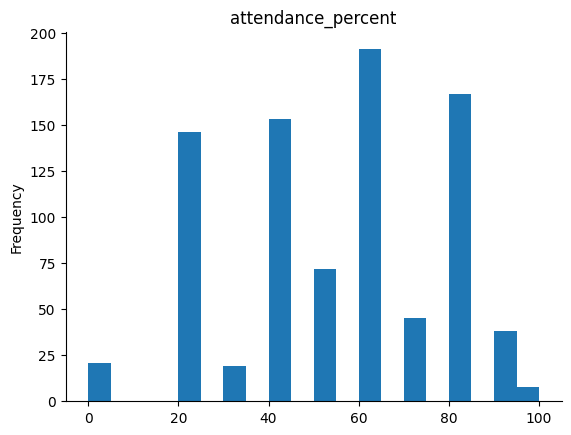

In [ ]:
# @title attendance_percent

from matplotlib import pyplot as plt
df['attendance_percent'].plot(kind='hist', bins=20, title='attendance_percent')
plt.gca().spines[['top', 'right',]].set_visible(False)

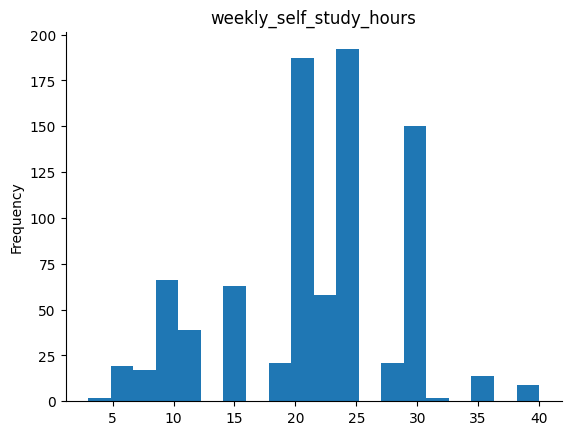

In [ ]:
from matplotlib import pyplot as plt
df['weekly_self_study_hours'].plot(kind='hist', bins=20, title='weekly_self_study_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print("At risk students")
print(df['at_risk'].value_counts())

At risk students
at_risk
1    524
0    336
Name: count, dtype: int64


In [ ]:
print("Students with part time job")
print(df['part_time_job'].value_counts())

print("Students with activites")
print(df['extracurricular_activities'].value_counts())

Students with part time job
part_time_job
0    469
1    391
Name: count, dtype: int64
Students with activites
extracurricular_activities
1    552
0    308
Name: count, dtype: int64


In [ ]:
print("Students with average score > 70%:")
print((df['average_score'] >= performance_threshold).value_counts())

print("Students with attendance > 50%:")
print((df['attendance_percent'] >= attendance_threshold).value_counts())


Students with average score > 70%:
average_score
True     666
False    194
Name: count, dtype: int64
Students with attendance > 50%:
attendance_percent
True     521
False    339
Name: count, dtype: int64


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()

    print("Testing Accuracy")
    print(model.score(X_test, y_test))
    print("Training Accuracy")
    print(model.score(X_train, y_train))

## Classification Model (SVC)

Model: StackingClassifier
Accuracy: 0.9884
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        70
           1       0.98      1.00      0.99       102

    accuracy                           0.99       172
   macro avg       0.99      0.99      0.99       172
weighted avg       0.99      0.99      0.99       172



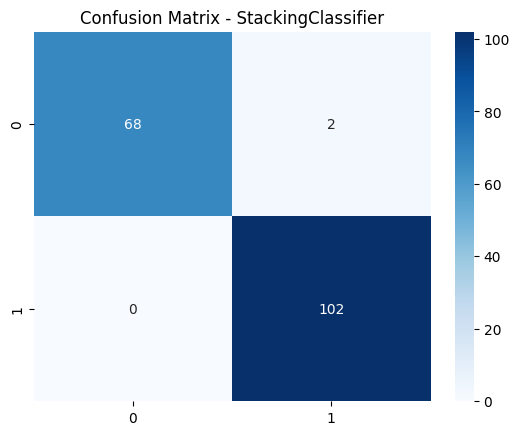

Testing Accuracy
0.9883720930232558
Training Accuracy
0.9781976744186046
Cross-Validation Scores: [1.         1.         1.         1.         1.         0.94186047
 0.95348837 0.96511628 0.91860465 0.94186047]
Mean Cross-Validation Score: 0.9721


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('svc', SVC(probability=True))  # Set probability=True to enable stacking
]
final_model = SVC()

model = StackingClassifier(estimators=base_models, final_estimator=final_model)

k = 10
scores = cross_val_score(model, X, y, cv=k)
evaluate_model(model, X_train, X_test, y_train, y_test)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean():.4f}")


## References

In [ ]:
df = df.drop(columns=['career_aspiration'])

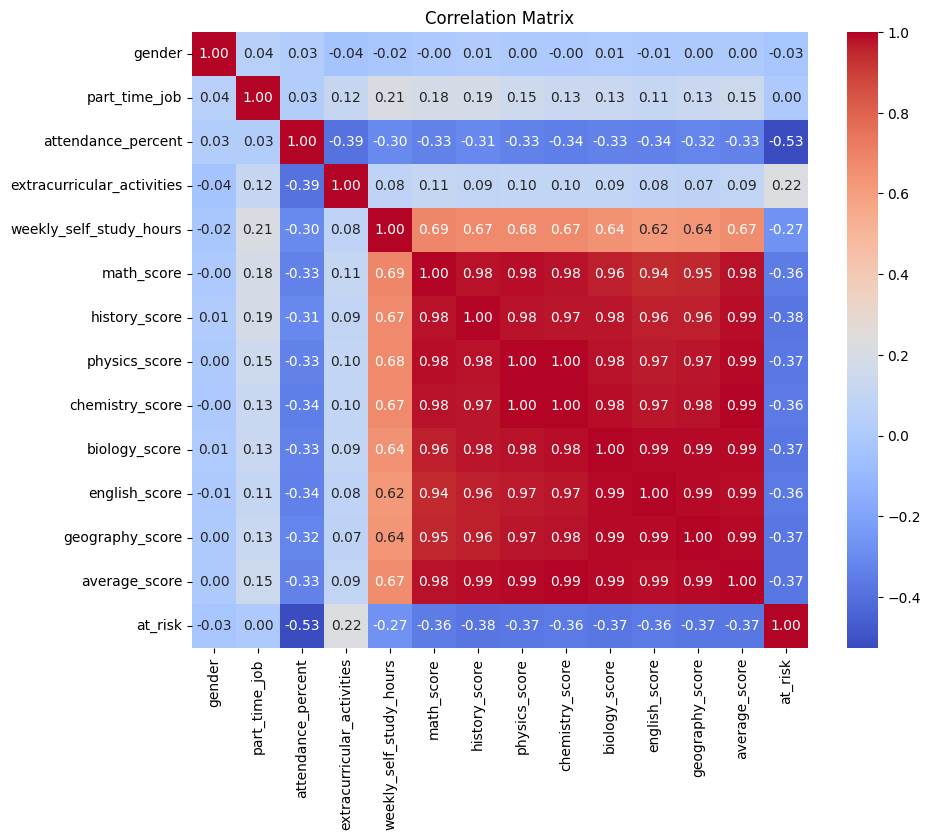

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df = df.drop(columns=['gender'])

In [ ]:
def calculate_attrition_score(row):
    score_factor = (100 - row['average_score']) / 100  # Higher average score increases attrition
    attendance_factor = (100 - row['attendance_percent']) / 100  # Higher attendance increases attrition
    job_factor = row['part_time_job'] * 0.1
    activity_factor = row['extracurricular_activities'] * 0.1  # If involved in extracurriculars, increase attrition
    weekly_study_factor = row['weekly_self_study_hours'] / 100

    # Combine the factors into an attrition score
    attrition_score = score_factor + attendance_factor + job_factor + activity_factor + weekly_study_factor
    return attrition_score

# Apply the function to each row in the dataset
df['attrition_score'] = df.apply(calculate_attrition_score, axis=1)

In [ ]:
df.head()

,part_time_job,attendance_percent,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score,at_risk,attrition_score
0,0,60.0,1,25,82,75,88,90,80,85,78,82.571429,0,0.924286
1,1,20.0,0,30,90,85,92,87,83,88,81,86.571429,1,1.334286
2,0,40.0,1,20,78,80,84,85,79,76,82,80.571429,1,1.094286
3,0,0.0,1,35,95,88,90,92,85,87,90,89.571429,1,1.554286
4,1,80.0,0,28,76,72,88,80,77,81,83,79.571429,0,0.784286


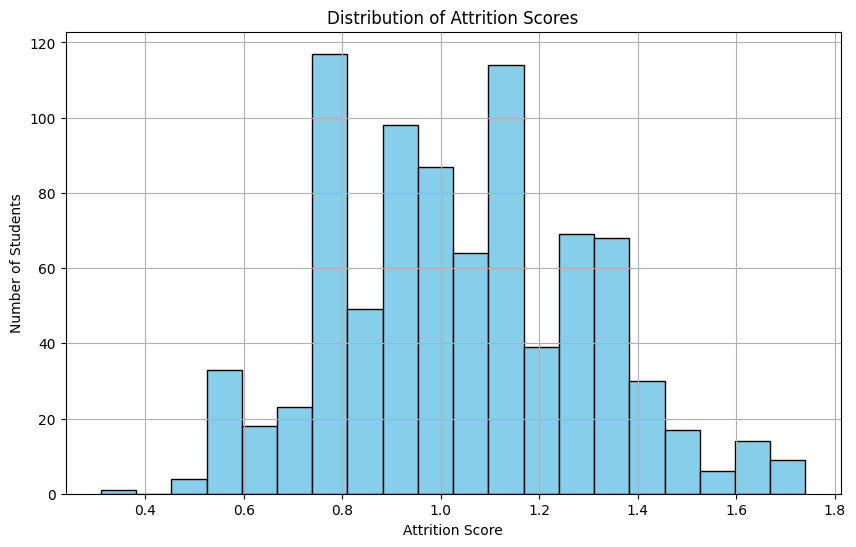

In [ ]:
# prompt: plot attrition_score

plt.figure(figsize=(10, 6))
plt.hist(df['attrition_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Attrition Score')
plt.ylabel('Number of Students')
plt.title('Distribution of Attrition Scores')
plt.grid(True)
plt.show()


In [ ]:
# print rows hvaing -ve attrition score
df[df['attrition_score'] < 0]


,part_time_job,attendance_percent,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score,at_risk,attrition_score


In [ ]:
above = len(df[df['attrition_score'] > 1.0])
below = len(df[df['attrition_score'] <= 1.0])

print(f"Number of rows with attrition score above threshold: {above}")
print(f"Number of rows with attrition score less than or equal to threshold: {below}")


Number of rows with attrition score above threshold: 458
Number of rows with attrition score less than or equal to threshold: 402


In [ ]:
def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print(f"Model: {model.__class__.__name__}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

    return {"model": model.__class__.__name__,
            "MSE": mse,
            "RMSE": rmse,
            "R²": r2}


## Regression Model (RFR)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import KFold

# Prepare your features and target variable
X = df[['average_score', 'attendance_percent', 'part_time_job', 'extracurricular_activities', 'weekly_self_study_hours']]
y = df['attrition_score']

# Initialize the Random Forest Regressor with default parameters
rf_model = RandomForestRegressor(random_state=42)

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Train the model using cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}')

# Fit the final model on the entire dataset
rf_model.fit(X, y)

evaluate_regression_model(rf_model, X_train, X_test, y_train, y_test)

MSE: 0.0012, RMSE: 0.0343, R²: 0.9808
MSE: 0.0011, RMSE: 0.0328, R²: 0.9848
MSE: 0.0017, RMSE: 0.0415, R²: 0.9743
MSE: 0.0016, RMSE: 0.0405, R²: 0.9767
Model: RandomForestRegressor
MSE: 0.0016
RMSE: 0.0405
R²: 0.9767


{'model': 'RandomForestRegressor',
 'MSE': 0.0016418041936402407,
 'RMSE': 0.04051918303273452,
 'R²': 0.9767312936040985}

## References

In [ ]:
df

,part_time_job,attendance_percent,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score,at_risk,attrition_score
0,0,60.0,1,25,82,75,88,90,80,85,78,82.571429,0,0.924286
1,1,20.0,0,30,90,85,92,87,83,88,81,86.571429,1,1.334286
2,0,40.0,1,20,78,80,84,85,79,76,82,80.571429,1,1.094286
3,0,0.0,1,35,95,88,90,92,85,87,90,89.571429,1,1.554286
4,1,80.0,0,28,76,72,88,80,77,81,83,79.571429,0,0.784286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0,50.0,1,10,89,88,87,86,85,84,83,86.000000,0,0.840000
856,0,70.0,1,20,90,91,92,93,94,95,96,93.000000,0,0.670000
857,0,30.0,0,15,84,85,86,87,88,89,90,87.000000,1,0.980000
858,0,50.0,1,10,90,91,92,93,94,95,96,93.000000,0,0.770000


In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
# @title Input values
def get_student_input():
    # Gather the necessary inputs from the user
    while True:
        try:
            math_score = float(input("Enter Math score (0-100): "))
            if math_score < 0 or math_score > 100:
                raise ValueError("Score must be between 0 and 100.")

            history_score = float(input("Enter History score (0-100): "))
            if history_score < 0 or history_score > 100:
                raise ValueError("Score must be between 0 and 100.")

            physics_score = float(input("Enter Physics score (0-100): "))
            if physics_score < 0 or physics_score > 100:
                raise ValueError("Score must be between 0 and 100.")

            chemistry_score = float(input("Enter Chemistry score (0-100): "))
            if chemistry_score < 0 or chemistry_score > 100:
                raise ValueError("Score must be between 0 and 100.")

            biology_score = float(input("Enter Biology score (0-100): "))
            if biology_score < 0 or biology_score > 100:
                raise ValueError("Score must be between 0 and 100.")

            english_score = float(input("Enter English score (0-100): "))
            if english_score < 0 or english_score > 100:
                raise ValueError("Score must be between 0 and 100.")

            geography_score = float(input("Enter Geography score (0-100): "))
            if geography_score < 0 or geography_score > 100:
                raise ValueError("Score must be between 0 and 100.")

            # Other fields
            absence_days = float(input("Enter attendance percentage (0-100): "))
            if absence_days < 0 or absence_days > 100:
                raise ValueError("Attendance percentage must be between 0 and 100.")

            part_time_job = int(input("Do you have a part-time job? (1 for Yes, 0 for No): "))
            if part_time_job not in [0, 1]:
                raise ValueError("Invalid input. Please enter 1 for Yes or 0 for No.")

            extracurricular_activities = int(input("Do you participate in extracurricular activities? (1 for Yes, 0 for No): "))
            if extracurricular_activities not in [0, 1]:
                raise ValueError("Invalid input. Please enter 1 for Yes or 0 for No.")

            weekly_self_study_hours = float(input("Enter weekly self-study hours: "))
            if weekly_self_study_hours < 0:
                raise ValueError("Weekly self-study hours cannot be negative.")

            # Calculate average score based on inputs
            average_score = np.mean([math_score, history_score, physics_score, chemistry_score, biology_score, english_score, geography_score])

            # Create a single input vector
            student_input = pd.DataFrame([[average_score, absence_days, part_time_job, extracurricular_activities, weekly_self_study_hours]],
                                         columns=['average_score', 'attendance_percent', 'part_time_job', 'extracurricular_activities', 'weekly_self_study_hours'])
            # DataFrame for all subject marks
            student_marks = pd.DataFrame([[math_score, history_score, physics_score, chemistry_score, biology_score, english_score, geography_score]],
                                         columns=['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score'])

            return student_input, student_marks

        except ValueError as e:
            print(e)  # Print the error message
        except Exception as e:
            print(f"An unexpected error occurred: {e}")  # Catch all other exceptions


In [ ]:
def predict_risk_and_attrition(student_input):
    # Classification prediction (At risk or not)
    risk_prediction = model.predict(student_input)[0]

    # Regression prediction (Attrition score)
    attrition_prediction = rf_model.predict(student_input)[0]

    return risk_prediction, attrition_prediction

In [ ]:
# Function to suggest specific subjects to focus on based on average scores
def suggest_subjects(student_input):
    subjects = ['Math', 'History', 'Physics', 'Chemistry', 'Biology', 'English', 'Geography']
    low_scores = []

    for subject in subjects:
        if student_input[subject.lower() + '_score'].values[0] < 60:
            low_scores.append(subject)

    return low_scores

def check_consistency(user_input):
    # Example rule: if study hours are high but average score is low, flag as inconsistent
    # Accessing values from the DataFrame using column names
    study_hours = user_input['weekly_self_study_hours'].values[0]
    avg_score = user_input['average_score'].values[0]
    attendance = user_input['attendance_percent'].values[0]

    # Example threshold
    if study_hours > 30 and avg_score < 50:  # You can adjust thresholds
        return 1

# Recommend based on Predictions (with Risk and Dropout Suggestion)
def generate_recommendations(attrition_score, risk_prediction, student_input, student_marks):
    attendance = student_input['attendance_percent'].values[0]
    average_score = student_input['average_score'].values[0]
    part_time_job = student_input['part_time_job'].values[0]
    extracurricular_activities = student_input['extracurricular_activities'].values[0]
    self_study_hours = student_input['weekly_self_study_hours'].values[0]

    # Identify subjects with low marks (below 60)
    low_mark_subjects = suggest_subjects(student_marks)
    print("\n=== Recommendations ===\n")

    # Risk Prediction Logic: Whether the student is at risk based on classification
    # if risk_prediction == 1:
    #     print("⚠️ You have been flagged as 'at risk' of dropping out. Immediate intervention is recommended.\n")
    # Check for DROP recommendation first
    if attrition_score > 1.4 and risk_prediction == 1:
        print("❗ Consider taking a DROP as it is too difficult to cover up.")
        return

    if attrition_score <= 0.6 and risk_prediction == 0:  # Low risk based on both models
        print("✅ Your attrition risk is low, and you're not flagged as 'at risk.' Keep up the good work!")
        if average_score > 85:
            print("- You're excelling academically.")
        if extracurricular_activities:
            print("- Great job balancing studies and extracurricular activities.")
    elif 0.6 <= attrition_score < 1.0 and risk_prediction == 0:  # Moderate risk but not flagged 'at risk'
        print("⚠️ You have a moderate risk of attrition. Here are some suggestions to reduce your risk:")
        if average_score < 70:
            print("- Focus on improving your academic scores. Consider setting a structured study plan.")
        if attendance < 75:
            print("- Work on improving your attendance. Set reminders or alarms to ensure regular class participation.")
        if extracurricular_activities:
            print("- Joining extracurricular activities could relieve stress but attending lectures is neccessary to keep your attendance.")
        if self_study_hours < 10:
            print("- Increase your weekly self-study hours to strengthen your understanding of subjects.")
        if low_mark_subjects:
            print(f"- Focus on improving in these subjects: {', '.join(low_mark_subjects)}.")

    elif 0.6 <= attrition_score < 1.0 and risk_prediction == 1:  # Moderate attrition but flagged as 'at risk'
        print("⚠️ Although your attrition score is moderate, you're flagged as 'at risk.' Immediate action is required to prevent further decline.")
        if average_score < 70:
            print("- You need to significantly improve your academic performance.")
        if attendance < 75:
            print("- Your attendance is a major concern. Make a conscious effort to attend all classes from now.")
        if self_study_hours < 10:
            print("- You should allocate more time for self-study. Aim for at least 10 hours of focused study per week.")
        if part_time_job:
            print("- Consider reducing your part-time job hours as it might be affecting your academic performance.")
        if low_mark_subjects:
            print(f"- Pay special attention to these subjects where you're scoring low: {', '.join(low_mark_subjects)}.")

    elif 1.2 <= attrition_score <= 1.4 and risk_prediction == 1:  # High attrition score or high risk
        print("🚨 Your attrition risk is high. Immediate intervention is strongly recommended.")
        if average_score < 50:
            print("- Your academic scores are very low. It’s crucial to seek help from teachers or academic counselors immediately.")
        if attendance < 60:
            print("- Very low attendance is contributing to your high attrition risk. Work on attending classes on regular basis.")
        if self_study_hours < 10:
            print("- Increase self-study hours and work with mentors to create a better study plan.")
        if part_time_job:
            print("- Your part-time job may be affecting your studies. Consider reducing work hours and pay attention to studies.")
        if low_mark_subjects:
            print(f"- You are struggling in these subjects: {', '.join(low_mark_subjects)}.")


In [ ]:
# @title Testing
# Example for debugging
sample_input = {
    'average_score': 90,  # For example
    'attendance_percent': 32,
    'part_time_job': 0,
    'extracurricular_activities': 1,
    'weekly_self_study_hours': 12
}

# Manually compute the attrition score
manual_score = calculate_attrition_score(sample_input)

# Get model prediction
input_features = np.array([[sample_input['average_score'],
                            sample_input['attendance_percent'],
                            sample_input['part_time_job'],
                            sample_input['extracurricular_activities'],
                            sample_input['weekly_self_study_hours']]])

model_prediction = rf_model.predict(input_features)[0]

print(f'Manual Attrition Score: {manual_score}')
print(f'Model Prediction: {model_prediction}')


Manual Attrition Score: 1.0
Model Prediction: 1.0193714285714284


In [ ]:
3643# Get user input1
student_input, student_marks = get_student_input()
1
# print(student_input)
# print(student_marks)
if check_consistency(student_input):
    print("")
    print("Warning: The user shows potential inconsistency.")

risk_prediction, attrition_score = predict_risk_and_attrition(student_input)
# Generate recommendations
recommendations = generate_recommendations(attrition_score, risk_prediction, student_input, student_marks)

# Output the results and recommendat9ions
print(f"Risk Prediction: {'At Risk' if risk_prediction == 1 else 'Not At Risk'}")
print(f"Attrition Score: {attrition_score:.2f}")

Enter Math score (0-100): 50
Enter History score (0-100): 55
Enter Physics score (0-100): 86
Enter Chemistry score (0-100): 94
Enter Biology score (0-100): 46
Enter English score (0-100): 88
Enter Geography score (0-100): 75
Enter attendance percentage (0-100): 48
Do you have a part-time job? (1 for Yes, 0 for No): 0
Do you participate in extracurricular activities? (1 for Yes, 0 for No): 1
Enter weekly self-study hours: 12

=== Recommendations ===

⚠️ Although your attrition score is moderate, you're flagged as 'at risk.' Immediate action is required to prevent further decline.
- Your attendance is a major concern. Make a conscious effort to attend all classes from now.
- Pay special attention to these subjects where you're scoring low: Math, History, Biology.
Risk Prediction: At Risk
Attrition Score: 0.94


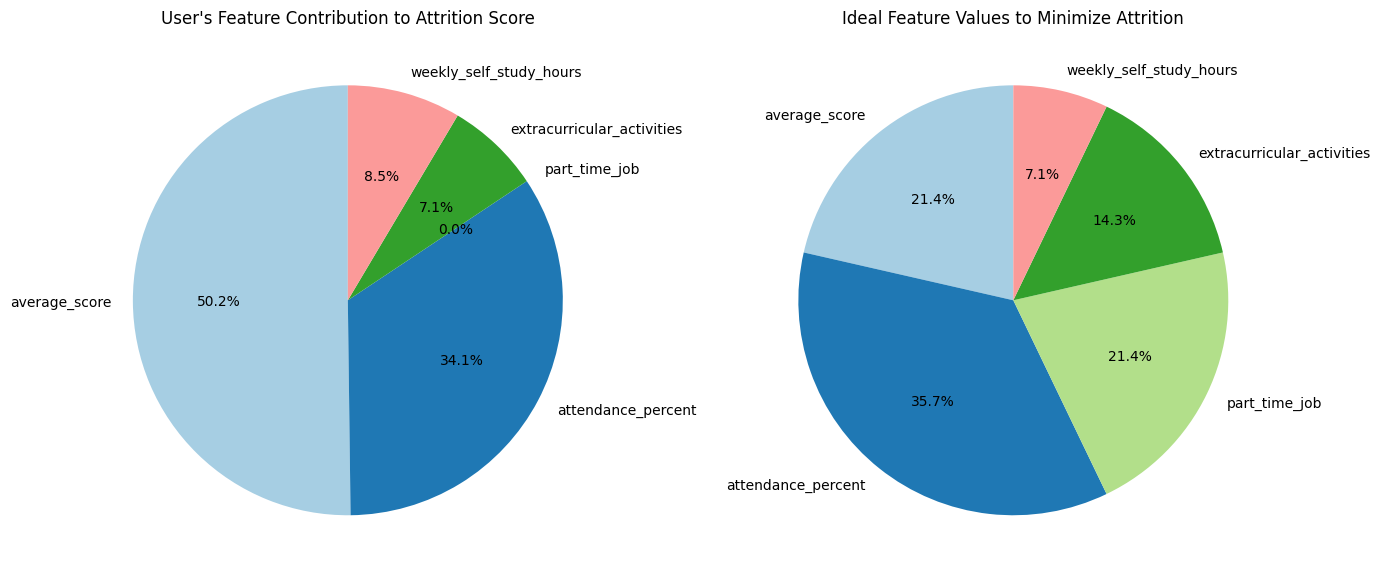

Risk Prediction: At Risk
Attrition Score: 0.94


In [ ]:
# @title GAP Analysis for Attrition value
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have the trained RandomForestRegressor model
# regression_model.fit(X_train_reg, y_train_reg)

# Function to plot feature contributions and ideal values
def plot_feature_comparison(model, user_input, feature_names, ideal_values):
    # Calculate the user's actual feature values contribution
    user_values = user_input[0]
    user_contributions = user_values

    # Normalize user contributions for better comparison
    user_contributions = user_contributions / np.sum(user_contributions)

    # Normalize the ideal values
    ideal_contributions = ideal_values / np.sum(ideal_values)

    # Plotting two pie charts side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # Pie chart for user's feature contributions
    ax1.pie(user_contributions, labels=feature_names, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax1.set_title("User's Feature Contribution to Attrition Score")

    # Pie chart for ideal contributions
    ax2.pie(ideal_contributions, labels=feature_names, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax2.set_title("Ideal Feature Values to Minimize Attrition")

    # Show the plots
    plt.tight_layout()
    plt.show()

# Define the feature names (matching the columns in your dataframe)
feature_names = ['average_score', 'attendance_percent', 'part_time_job', 'extracurricular_activities', 'weekly_self_study_hours']

# Example of ideal values to keep attrition low (based on expert opinion or data)
ideal_values = np.array([0.3, 0.5, 0.3, 0.2, 0.1])  # Hypothetical ideal values 70 score, 50 attendance, 0.3 job, 0.2 activities, 0.1 weekly study hours.

# Call the function to plot both the user's contribution and ideal values

attendance = (student_input['attendance_percent'].values[0]) / 100
average_score = (student_input['average_score'].values[0]) / 100
part_time_job = student_input['part_time_job'].values[0] * 0.1
extracurricular_activities = student_input['extracurricular_activities'].values[0] * 0.1
self_study_hours = student_input['weekly_self_study_hours'].values[0] / 100

user_input = np.array([[average_score, attendance, part_time_job, extracurricular_activities, self_study_hours]])
# print(user_input)
plot_feature_comparison(rf_model, user_input, feature_names, ideal_values)

print(f"Risk Prediction: {'At Risk' if risk_prediction == 1 else 'Not At Risk'}")
print(f"Attrition Score: {attrition_score:.2f}")


## USER INPUT

In [ ]:
# Get user input
student_input, student_marks = get_student_input()

# Predict risk and attrition score
risk_prediction, attrition_score = predict_risk_and_attrition(student_input)

# Generate recommendations
recommendations = generate_recommendations(attrition_score, risk_prediction, student_input, student_marks)

# Output the results and recommendations
print(f"Risk Prediction: {'At Risk' if risk_prediction == 1 else 'Not At Risk'}")
print(f"Attrition Score: {attrition_score:.2f}")

Enter Math score (0-100): 10
Enter History score (0-100): 7
Enter Physics score (0-100): 9
Enter Chemistry score (0-100): 12
Enter Biology score (0-100): 15
Enter English score (0-100): 11
Enter Geography score (0-100): 20
Enter attendance percentage (0-100): 15
Do you have a part-time job? (1 for Yes, 0 for No): 0
Do you participate in extracurricular activities? (1 for Yes, 0 for No): 1
Enter weekly self-study hours: 8

=== Recommendations ===

❗ Consider taking a DROP as it is too difficult to cover up.
Risk Prediction: At Risk
Attrition Score: 1.60


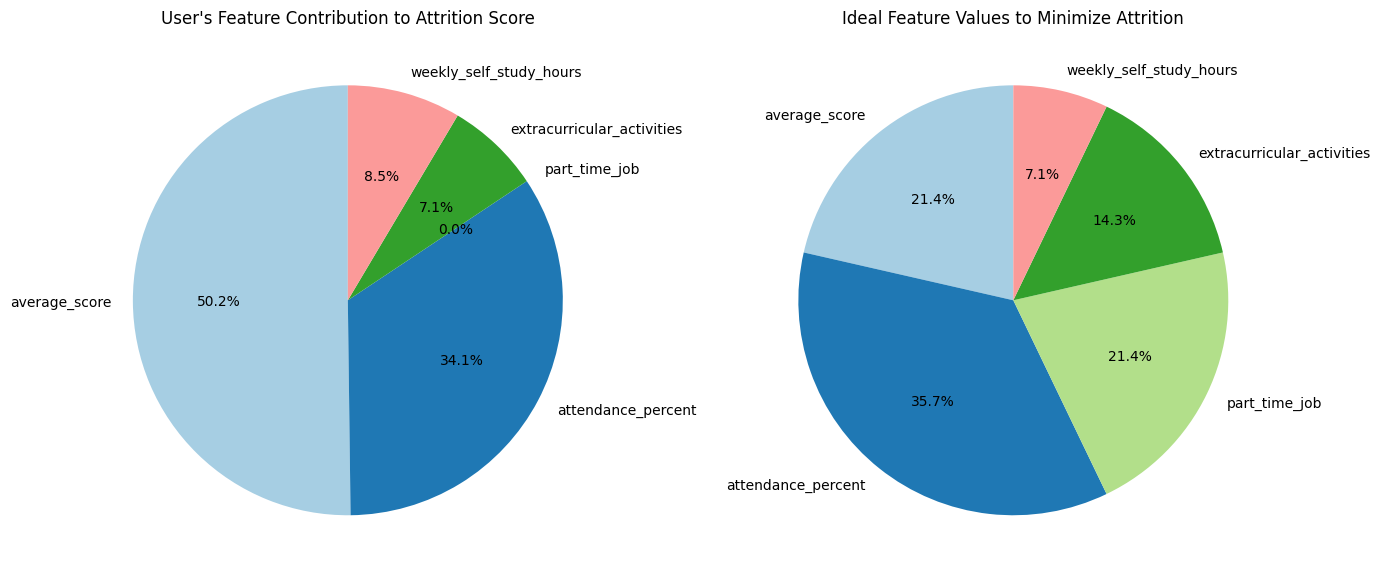

Risk Prediction: At Risk
Attrition Score: 1.60


In [ ]:
# @title GAP Analysis for Attrition value
user_input = np.array([[average_score, attendance, part_time_job, extracurricular_activities, self_study_hours]])
# print(user_input)
plot_feature_comparison(rf_model, user_input, feature_names, ideal_values)

print(f"Risk Prediction: {'At Risk' if risk_prediction == 1 else 'Not At Risk'}")
print(f"Attrition Score: {attrition_score:.2f}")


In [ ]:
# Get user input
student_input, student_marks = get_student_input()

# Predict risk and attrition score
risk_prediction, attrition_score = predict_risk_and_attrition(student_input)

# Generate recommendations
recommendations = generate_recommendations(attrition_score, risk_prediction, student_input, student_marks)

# Output the results and recommendations
print(f"Risk Prediction: {'At Risk' if risk_prediction == 1 else 'Not At Risk'}")
print(f"Attrition Score: {attrition_score:.2f}")


Enter Math score (0-100): 98
Enter History score (0-100): 96
Enter Physics score (0-100): 95
Enter Chemistry score (0-100): 89
Enter Biology score (0-100): 88
Enter English score (0-100): 87
Enter Geography score (0-100): 94
Enter attendance percentage (0-100): 87
Do you have a part-time job? (1 for Yes, 0 for No): 0
Do you participate in extracurricular activities? (1 for Yes, 0 for No): 1
Enter weekly self-study hours: 18

=== Recommendations ===

✅ Your attrition risk is low, and you're not flagged as 'at risk.' Keep up the good work!
- You're excelling academically.
- Great job balancing studies and extracurricular activities.
Risk Prediction: Not At Risk
Attrition Score: 0.41


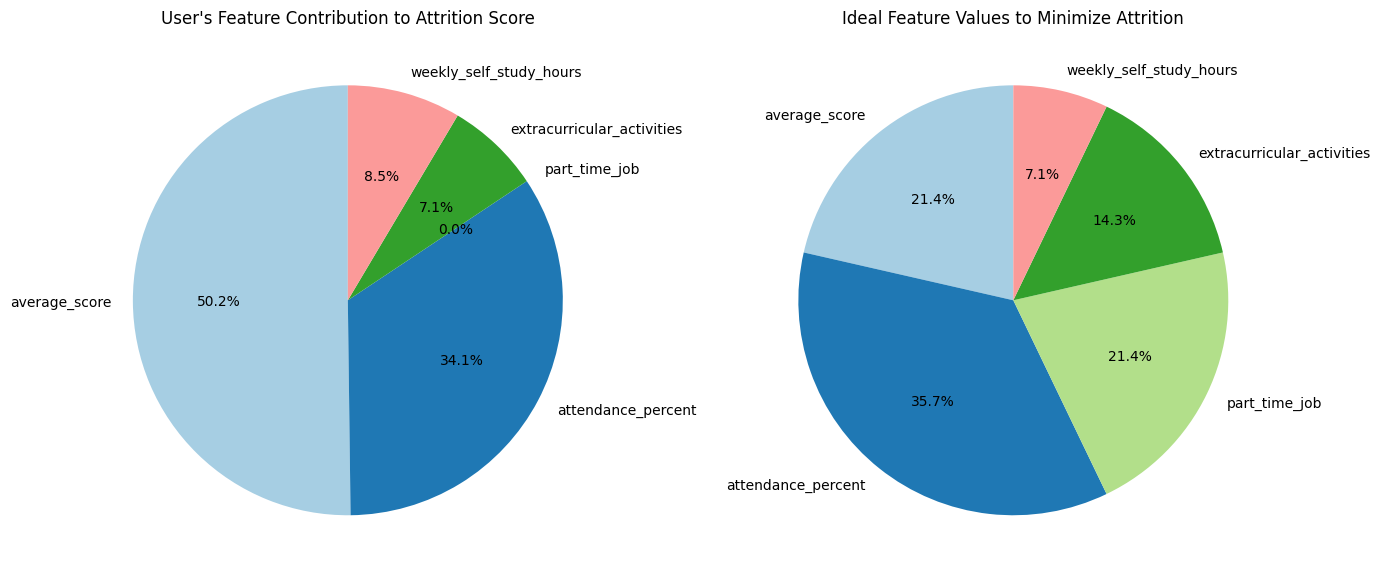

Risk Prediction: Not At Risk
Attrition Score: 0.41


In [ ]:
# @title GAP Analysis for Attrition value
user_input = np.array([[average_score, attendance, part_time_job, extracurricular_activities, self_study_hours]])
# print(user_input)
plot_feature_comparison(rf_model, user_input, feature_names, ideal_values)

print(f"Risk Prediction: {'At Risk' if risk_prediction == 1 else 'Not At Risk'}")
print(f"Attrition Score: {attrition_score:.2f}")
